In [1]:
import matplotlib.pyplot as plt
import Master
import numpy as np
from tifffile import TiffFile
import os
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'auto')
plt.rcParams.update({'font.size': 16})

Using matplotlib backend: TkAgg


initialize topology...


/home/christoph/gits/CH-reconstruction/Master.py:187: UserWarning: loadtxt: Empty input file: "/home/christoph/gits/CH-reconstruction/tests2/error3D.txt"
  if exists:
/home/christoph/.local/lib/python3.6/site-packages/matplotlib/image.py:865: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  self.axes.set_ylim((ymin, ymax), auto=None)


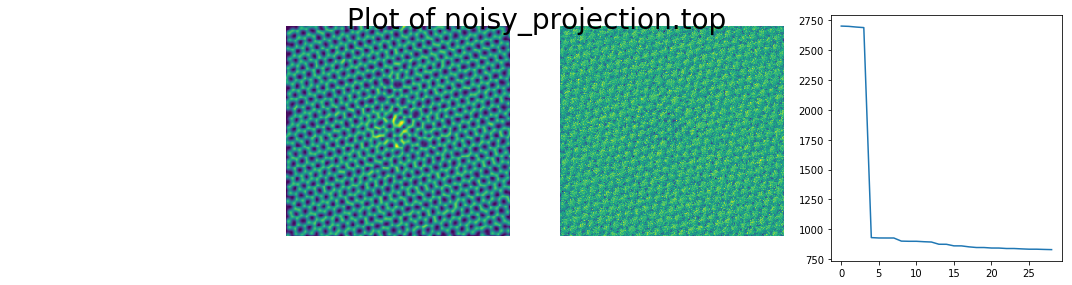

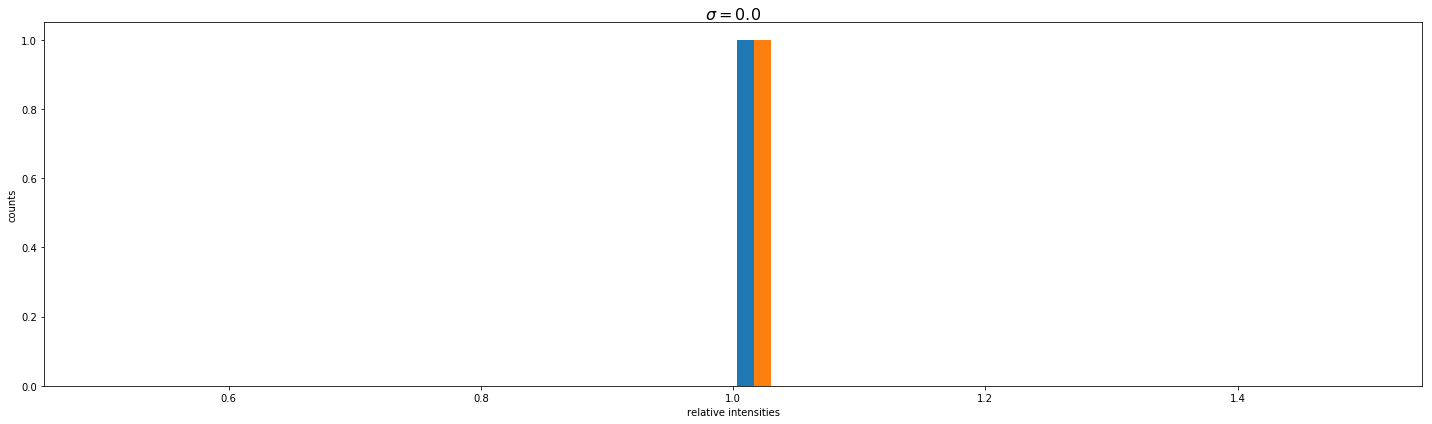

In [20]:
topfile='/home/christoph/gits/CH-reconstruction/tests2/noisy_projection.top'
name=os.path.basename(topfile)
path=os.path.dirname(topfile)+'/'
image_stack=TiffFile(topfile[:-4]+'.tif').asarray()
stacked=False
reset=False
bplot=False
twoDplot=True
threeDplot=True

if reset:
    carbons=[]
    impurities=[]
try:
    mask=TiffFile(path+'mask.tif').asarray()
except FileNotFoundError:
    mask=[]

print('initialize topology...')
master=Master.Master(topfile,'beamparameters.txt',image_stack,mask=mask)

if twoDplot:
    f,ax=plt.subplots(len(master.views),4,figsize=(15,4))
    ax=np.atleast_2d(ax)
    f.suptitle('Plot of '+name,fontsize=28)
    for i in range(len(master.views)):
        for j in range(3):
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].set_axis_off()

        master.views[i].simulate_and_update_error()
        ax[i,0].imshow(image_stack[i][~np.isnan(image_stack[i]).all(axis=0)])
        ax[i,1].imshow(master.views[i].simulation[~np.isnan(master.views[i].simulation).all(axis=0)])
        ax[i,2].imshow(master.views[i].diffimage[~np.isnan(master.views[i].diffimage).all(axis=0)])
        ax[i,3].plot(master.views[i].track_error)
    plt.tight_layout()
    plt.show()



if not stacked:
    f2,ax2=plt.subplots(1,len(master.views),figsize=(20,6))
    ax2=np.atleast_1d(ax2)
    for i in range(len(master.views)):
        ints=master.views[i].get_intensities()
        intscarbon=ints[0]
        intscarbon=intscarbon[intscarbon>0.2]
        std=np.std(intscarbon)
        ax2[i].hist([intscarbon,ints[1]],bins=30)
        ax2[i].text(ax2[i].get_xlim()[1]/2+ax2[i].get_xlim()[0]/2,ax2[i].get_ylim()[1],r'$\sigma=$'+str(round(std,3)),
           verticalalignment='bottom',horizontalalignment='center',fontsize=16)
        ax2[i].set_xlabel('relative intensities')
        ax2[i].set_ylabel('counts')
    plt.tight_layout()
    plt.savefig(path+'intensities.svg')
    plt.show()
else:
    if not bplot:
        #f3=plt.figure(figsize=(15,10))
        for i in range(len(master.views)):
            carbons.append(master.views[i].get_intensities()[0])
            impurities.append(master.views[i].get_intensities()[1])

if bplot and stacked:
    #impurities= [item for sublist in impurities for item in sublist]
    #carbons= [item for sublist in carbons for item in sublist]
    plt.xlim(0.3,2.2)
    plt.hist([carbons,impurities],bins=30)
    plt.show()

In [17]:
image_stack

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)